# Midterm Exam Study Guide

The Midterm exam
+ Will be in class next Tuesday.
+ Bring your laptop.  You'll download the exam (Jupyter notebook); work on it and submit it to eLearn.
+ You may view lecture notes, assingment solutions, https://pandas.pydata.org, https://scikit-learn.org, https://seaborn.pydata.org.
+ You may not access other resources (people, documents, etc.)
+ You should earn +80 points if you understand/have the fundamental concepts/skills.


You have to understand these concepts:
+ Dataframes and series.
+ Fundamental visualization concepts: numerical versus categorical variables.
+ $R^2$
+ Model validation, cross-validation, training versus testing
+ The purpose of dummy variables to represent categorical variables.
+ Trend and seasonality in timeseries data
+ Classification versus Regression


You have to be able to:
+ Manipulations of dataframes and series:
    + Select columns; select rows using indices and labels.
    + Select rows using boolean queries.
    + Create new columns from existing columns
    + Group data into groups
+ Visualize a distribution; a numerical/catagorical variable versus a numerical variable.
+ Evaluate a linear regression model.
+ Cross-validate
+ Use a model to make predictions
+ Convert categorical variables to dummy variables.
+ Use autocorrelation plot to detect seasonality
+ Decomposition of a timeseries into trend and seasonality
+ Create, validate and use DecisionTree models to make prediction

In [3]:
import pandas
perf = pandas.read_csv('../Datasets/student_performance.csv')

In [4]:
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Agenda:
+ What do you think people tried to understand with this data?
    + What's difference in math score between gender groups?
    + Does test preparation affect performance?
    + Can we predict writing scores?
    + Can we predict students who are at risk?

#### Manipulations of dataframes

Suppose we are interested in comparing student performance in different lunch categories.

Technical approaches:
+ Create a linear regression to model performance and lunch categories.
+ Group data by lunch categories, and compute average performance in each group.
+ Visualize performance in each category.

What is "performance"?
+ Math or reading or writing.
+ Average them.

Visualize the distributions of scores.

In [5]:
import seaborn

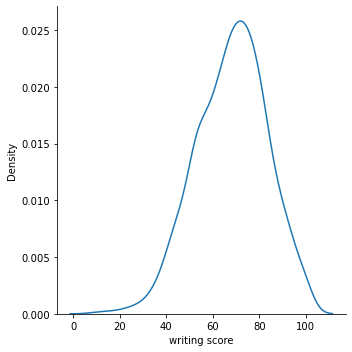

In [6]:
seaborn.displot(
    data=perf[['math score','reading score','writing score']],
    x='writing score',
    kind='kde',
)

In [7]:
perf[['math score','reading score','writing score']].mean().mean()

67.77066666666666

In [8]:
perf['score'] = (perf['math score'] + perf['reading score'] + perf['writing score'])/3

In [9]:
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


Is there a difference of performance in (1) different gender? (2) different race, (3) lunch, etc.

In [10]:
perf.groupby('lunch').agg(['mean','std']).round(1)

math score       reading score       writing score       score  \
                   mean   std          mean   std          mean   std  mean   
lunch                                                                         
free/reduced       58.9  15.2          64.7  14.9          63.0  15.4  62.2   
standard           70.0  13.7          71.7  13.8          70.8  14.3  70.8   

                    
               std  
lunch               
free/reduced  14.5  
standard      13.2

In [11]:
1-1/2**2, 1-1/3**2

(0.75, 0.8888888888888888)

c:\users\msaha1\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


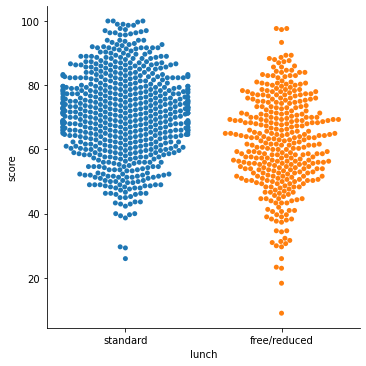

In [12]:
seaborn.catplot(data=perf, x='lunch', y='score', kind='swarm')

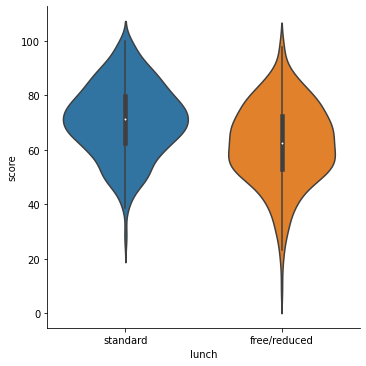

In [13]:
seaborn.catplot(data=perf, x='lunch', y='score', kind='violin')

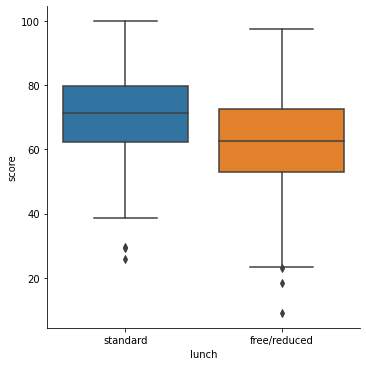

In [14]:
seaborn.catplot(data=perf, x='lunch', y='score', kind='box')

#### Model some relationships

In [15]:
perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Is there a strong correlation between math and reading?

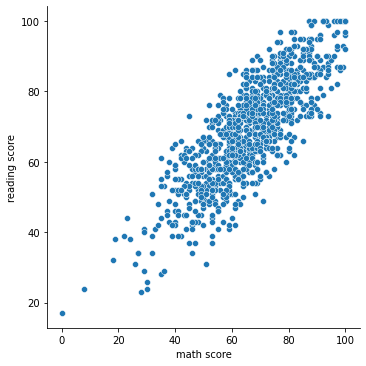

In [16]:
seaborn.relplot(data=perf, x='math score', y='reading score')

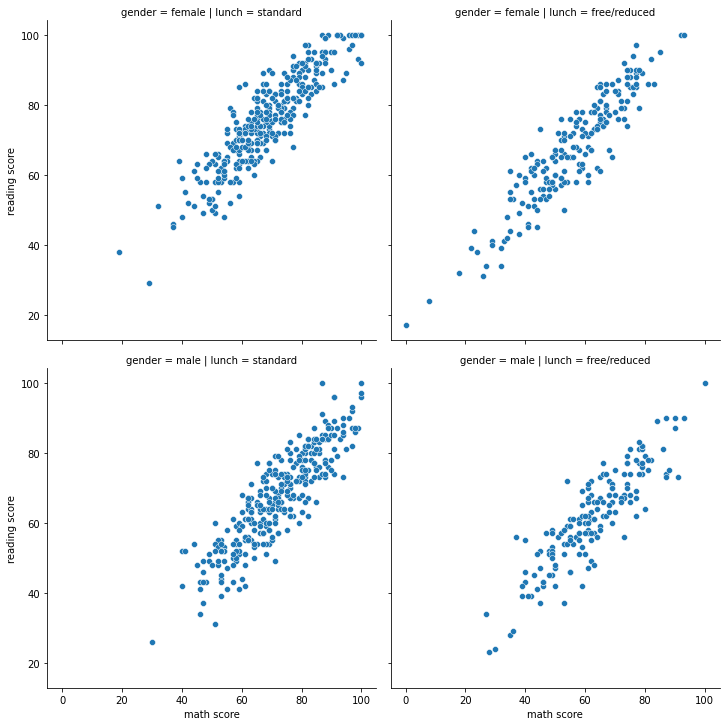

In [17]:
seaborn.relplot(data=perf, x='math score', y='reading score', col='lunch', row='gender')

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_validate

In [19]:
model = LinearRegression()
cv = ShuffleSplit(n_splits=200)

In [20]:
X = perf[['math score']]
y = perf['reading score']

In [21]:
result = cross_validate(model, X, y, cv=cv)

In [22]:
result['test_score'].mean(), result['test_score'].std()

(0.6599016045303675, 0.05350746043996761)

Does reducing lunch affect reading performance?

Technical approach:
+ Add lunch to the feature set.

In [23]:
X = perf[['math score','lunch']]
X = pandas.get_dummies(X)

In [24]:
result = cross_validate(model, X, y, cv=cv)
result['test_score'].mean(), result['test_score'].std()

(0.6610893407703461, 0.05026495948897423)

Can we predict students who are at risk?

In [25]:
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [26]:
t = perf.score.mean() - 1.5*perf.score.std()
1 - 1/1.5**2

0.5555555555555556

In [27]:
perf['at_risk'] = perf['score'] < t

In [28]:
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,at_risk
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,False
1,female,group C,some college,standard,completed,69,90,88,82.333333,False
2,female,group B,master's degree,standard,none,90,95,93,92.666667,False
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,False
4,male,group C,some college,standard,none,76,78,75,76.333333,False
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,False
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,False
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,False
998,female,group D,some college,standard,completed,68,78,77,74.333333,False


In [29]:
X = perf[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
X = pandas.get_dummies(X)
X

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [30]:
perf['at_risk']=perf['at_risk'].replace({True:1, False:0})

In [31]:
perf.at_risk.value_counts()

0    933
1     67
Name: at_risk, dtype: int64

In [32]:
y = perf.at_risk

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
result = cross_validate(model, X, y, cv=cv)
result['test_score'].mean(), result['test_score'].std()

(0.9228999999999999, 0.024466098994322717)

In [36]:
X

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [37]:
model.fit(X,y)

DecisionTreeClassifier()

In [38]:
model.feature_importances_.round(2)

array([0.02, 0.08, 0.02, 0.1 , 0.07, 0.07, 0.05, 0.03, 0.04, 0.1 , 0.02,
       0.08, 0.07, 0.  , 0.13, 0.03, 0.11])

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .3)
dtree = DecisionTreeClassifier(max_depth = 5)

dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

pr_score = precision_score(y_test, y_predict)
print(pr_score)

re_score = recall_score(y_test, y_predict)
print(re_score)

0.0
0.0


In [45]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [49]:
from sklearn.model_selection import cross_validate, ShuffleSplit

validator = ShuffleSplit(n_splits = 200)
result = cross_validate(dtree, X, y, cv = validator)
result['test_score'].mean()

0.932

In [52]:
y_test.value_counts()

0    280
1     20
Name: at_risk, dtype: int64

In [53]:
y_train.value_counts()

0    653
1     47
Name: at_risk, dtype: int64

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
y_predict = rf_clf.predict(X_test)
pr_scr = precision_score(y_test, y_predict)
re_scr = recall_score(y_test, y_predict)
print(pr_scr, re_scr)

0.0 0.0


In [58]:
print(y_test)

101    0
902    1
37     0
196    0
205    0
      ..
936    0
865    0
795    0
960    0
350    0
Name: at_risk, Length: 300, dtype: int64


In [56]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [57]:
y_test == y_predict

101     True
902    False
37      True
196     True
205     True
       ...  
936     True
865     True
795     True
960     True
350     True
Name: at_risk, Length: 300, dtype: bool

In [60]:
y_test[y_test != y_predict].sort_index()

7      1
11     1
33     1
76     1
84     1
93     1
211    1
217    1
331    1
338    1
375    1
395    1
527    1
555    1
568    0
729    1
787    1
842    1
862    1
902    1
928    1
952    0
Name: at_risk, dtype: int64

In [62]:
y_test[(y_test == 1) & (y_predict == 1)]

Series([], Name: at_risk, dtype: int64)

In [63]:
precision_score(y_train, rf_clf.predict(X_train))

0.7142857142857143

In [64]:
recall_score(y_train, rf_clf.predict(X_train))

0.10638297872340426

<AxesSubplot:>

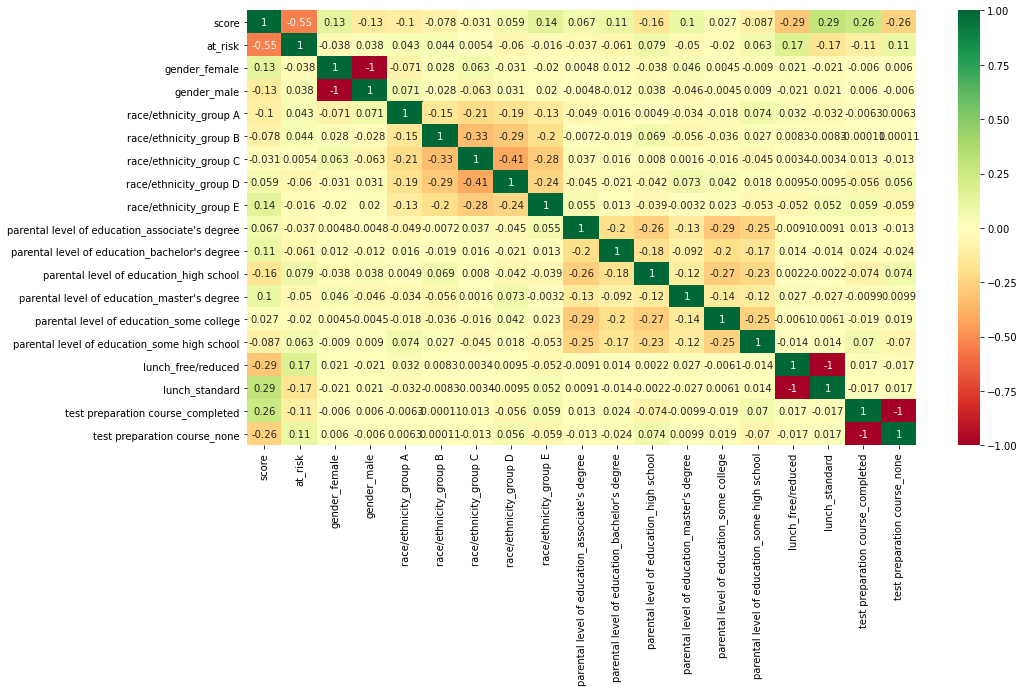

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.get_dummies(perf)
data.drop(columns = ['math score', 'reading score', 'writing score'], inplace = True) 
plt.figure(figsize = (15, 8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'RdYlGn')

In [65]:
perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,at_risk
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,0
